## Defining cross validation sets

In [1]:
!pip install focal-loss
!pip install plot-keras-history

%matplotlib inline
%load_ext autoreload
%autoreload 2

import h5py
import matplotlib.pyplot as plt

import numpy as np
import pandas as pd
from Load import *
from Utils import *
from Train import *
from Metrics import *
from Data_augmentation import *
from tcn import *
import torch
import numpy
import os

  Created wheel for plot-keras-history: filename=plot_keras_history-1.1.26-cp36-none-any.whl size=6515 sha256=1dd694ab6a20e0e6e94f4f06083cddd86076244fbcaef6f722d0a5cdd5efe88a
  Stored in directory: /root/.cache/pip/wheels/f5/6f/f1/84c54c13581bfe1ea75ff56743cb31707f552eabe682e9714a
  Created wheel for sanitize-ml-labels: filename=sanitize_ml_labels-1.0.23-cp36-none-any.whl size=6988 sha256=b64ce5177facb1d5f1d2bde45df648ac06ecec7b49cc75babc824b09ae67ae34
  Stored in directory: /root/.cache/pip/wheels/d2/b5/7d/a51cd1ac4ee246a7b59bcea6b37e768d9976ca5aa5918e7cd9
  Created wheel for compress-json: filename=compress_json-1.0.4-cp36-none-any.whl size=4585 sha256=f0a21ad63489bcdfb47e241f87922a898da637a3241d56bb19bf1ae4fe2e42b1
  Stored in directory: /root/.cache/pip/wheels/83/ec/21/51460dd508e4a152c0643946c21fae84eb3391171164d35745
Successfully built plot-keras-history sanitize-ml-labels compress-json


#Pour colab


!pip install focal-loss
!pip install plot_keras_history

!unzip data_fly


load_training_data()


### Unzip data fly file

In [3]:
!unzip data_fly
    

Archive:  data_fly.zip
   creating: data_fly/
   creating: data_fly/EMPTY_GT_nonV_170811_avi_ROI1_E08/
   creating: data_fly/L6p65_JFL3dbd_GT_180103_ROI3_E12/
   creating: data_fly/L6p65_JFL3dbd_GT_180103_ROI3_E15/
   creating: data_fly/EMPTY_GT_nonV_170811_avi_ROI1_E06/
   creating: data_fly/EMPTY_GT_nonV_170811_avi_ROI1_E07/
   creating: data_fly/L6p65_JFL3dbd_GT_180103_ROI3_E14/
   creating: data_fly/EMPTY_GT_nonV_170811_avi_ROI1_E09/
   creating: data_fly/L6p65_JFL3dbd_GT_180103_ROI3_E13/
  inflating: data_fly/.DS_Store      
  inflating: __MACOSX/data_fly/._.DS_Store  
   creating: data_fly/L6p65_JFL3dbd_GT_180103_ROI6_E14/
   creating: data_fly/L6p65_JFL3dbd_GT_180103_ROI6_E13/
   creating: data_fly/L6p65_JFL3dbd_GT_180103_ROI6_E12/
   creating: data_fly/L6p65_JFL3dbd_GT_180103_ROI6_E15/
   creating: data_fly/CS_ctrl_170608_avi_ROI3_E03/
   creating: data_fly/CS_170911_avi_ROI4_E06/
   creating: data_fly/L6p65_JFL3dbd_GT_180103_ROI6_E06/
   creating: data_fly/CS_ctrl_170608_avi_R

## Load, split data and data augmentation


In [4]:
X, Y = load_training_data()
train, test, val = data_augmentation_2(X,Y)

### Prepare data for test evaluation

In [6]:
X_tr = np.vstack((train[0], val[0]))
Y_tr = np.vstack((train[1], val[1]))

## Cross Validation


-> Parameters that we can modify:

   - Dilations(number of dilations & values)

   - Gammas values**

   - Kernel size**

   - Filter
   
   - Loss function

When we tested the parameters for one categorie and we found the best one we use it for the next categorie.

#Dilation coefficients and length

-> Moins de dilatations mais coefficients +eleves
Pas mieux si j en eleve plus ! 

**This sequence,(8,16,32,64,128,256,512,1024), gives the best F1-score and loss**

**(8,16,32,64,128,256,512,1024)**

F1 score per label:  [0.006700167570265677, 0.8243242894731283, 0.4760213032358214, 0.7636476145798784, 0, 0, 0, 0.847137820086767]
weighted F1 score : 67.083% (+/-1.090)
Macro F1 score : 35.837% (+/-1.671)
Accuracy : 93.776% (+/-0.234)
Loss : 0.156% (+/-0.010)

-> If we increase the number of dilations F1 score decreases

 **(1, 2, 4, 8,16,32,64,128,256,512,1024,2048)**

weighted F1 score built in:  0.6330021
macro F1 score built in:  0.29385638
Final accuracy:  0.9318307
-> Loss:  0.28774261474609375
-> F1 score per label:  [0.010008340618074617, 0.7095158419647516, 0.07556674943970726, 0.7053691215473735, 0, 0, 0.021943573590997016, 0.8284474191819274]

-> If we increase it a little bit less, F1-score is still lower

**(1, 2, 4, 8,16,32,64,128,256,512,1024)**

F1 score per label:  [0.10655235762152382, 0.7772494381745859, 0.45065791221848933, 0.6732673093945666, 0, 0, 0, 0.8463468888997626]
weighted F1 score : 67.119% (+/-0.403)
Macro F1 score : 35.512% (+/-0.737)
Accuracy : 93.702% (+/-0.185)
Loss : 0.274% (+/-0.028)

**(1, 2, 4, 8,16,32,64,128,256,512)**

F1 score per label:  [0.06528980923036334, 0.7611993121132301, 0.49837345659417526, 0.7376170914184981, 0, 0, 0, 0.8530197734517448]
weighted F1 score : 67.024% (+/-0.493)
Macro F1 score : 35.828% (+/-1.139)
Accuracy : 93.770% (+/-0.150)
Loss : 0.233% (+/-0.046)

-> If we use the optimal size of sequence but with lower parameter, F1 score is lower

**(1, 2, 4, 8,16,32,64,128)**

F1 score per label:  [0.003338898197196993, 0.7495075326638765, 0.4258970458345221, 0.5025171854228595, 0, 0, 0, 0.8043326426910498]
weighted F1 score : 64.171% (+/-1.132)
Macro F1 score : 29.661% (+/-1.109)
Accuracy : 93.468% (+/-0.271)
Loss : 0.200% (+/-0.017)
Mean F1 score per label:  [[0.00608611 0.75129152 0.15417737 0.61932627 0. 0.0.0.84198687]]

-> if the dilation sequence is reduced, F1 score gets really small

**(1, 2, 4, 8,16,32,64,128)**

weighted F1 score built in: 0.3926769 
macro F1 score built in: 0.20186198 
Final accuracy: 0.9005747 
Loss: 0.15046848356723785
F1 score per label: [0, 0.7109752222009469, 0, 0.4532803262320253, 0, 0, 0, 0.4506401787712925] 

-> if the dilation sequence is reduced and coefficients are higher, F1 score isn't better


## Gamma coefficient


**Gamma 2 is better however the loss isn't good, since the F1-score differences isn't that big we'll choose
Gamma 5 to have the best trade off between loss and F1-score**

**Gamma=5**

weighted F1 score : 67.962% (+/-1.004)
Macro F1 score : 38.028% (+/-1.313)
Accuracy : 93.217% (+/-0.165)
Loss : 0.026% (+/-0.007)
Mean F1 score per label:  [[0.12738377 0.79400162 0.46869762 0.67898915 0.00163171 0.
  0.13102519 0.84052519]]


**Gamma=2**

weighted F1 score : 68.797% (+/-0.561)
Macro F1 score : 40.234% (+/-0.780)
Accuracy : 93.058% (+/-0.091)
Loss : 0.154% (+/-0.011)
Mean F1 score per label:  [[0.21990431 0.7896605  0.46486182 0.72700341 0.05597455 0.00930233
  0.11004761 0.84199368]]

If gamma is smaller than 2 or bigger than 5,the F1 score decreases

## Kernel size

**The best kernel size is 2**

**Kernel size =2**
###Mettre resultat pour kernel 2 avec bonne dilatation et gamma 5

weighted F1 score : 73.007% (+/-0.154)
Macro F1 score : 42.024% (+/-0.938)
Accuracy : 93.590% (+/-0.131)
Loss : 0.025% (+/-0.004)
Mean F1 score per label:  [[0.2842268  0.77294993 0.51485655 0.66068219 0.11128281 0.03165657
  0.11693788 0.86929566]]

    
**Kernel size =5** 
(Better results for egg and Mean F1 than with kernel size = 2)

weighted F1 score : 73.252% (+/-0.683)
Macro F1 score : 41.821% (+/-1.038)
Accuracy : 93.650% (+/-0.276)
Loss : 0.038% (+/-0.013)
Mean F1 score per label:  [[0.29377889 0.7706173  0.52430056 0.66550429 0.0784761  0.02044602
  0.11963031 0.87290869]]
    
-> Increasing kernel size doesn't giver better results

**Kernel size =8** 

weighted F1 score : 72.634% (+/-0.147)
Macro F1 score : 41.085% (+/-0.416)
Accuracy : 93.385% (+/-0.125)
Loss : 0.040% (+/-0.007)
Mean F1 score per label:  [[0.23755278 0.7684531  0.49406533 0.66443388 0.15536077 0.01025641
  0.08549428 0.87121076]]


-> Decreasing kernel size doesn't giver better results

**Kernel size =3**  

Dilation =(8,16,32,64,128,256,512,1024)
Gamma =5
Mean eggs pred and true#:  345.4 378.0
weighted F1 score : 71.966% (+/-1.329)
Macro F1 score : 40.194% (+/-1.059)
Accuracy : 93.176% (+/-0.620)
Loss : 0.040% (+/-0.015)
Mean F1 score per label:  [[0.2937298  0.75107781 0.43110091 0.64897495 0.09630537 0.01613997
  0.1139567  0.86423324]]


    

## Filter size

Filter size equal to 64 is the best

**Filter_size=64**

weighted F1 score built in:  0.6707587
macro F1 score built in:  0.36046746
Final accuracy:  0.93621886
Loss:  0.07185634970664978
F1 score per label:  [0.010008340618074617, 0.7694510541784072, 0.5212046472407914, 0.7291217345431061, 0, 0, 0, 0.8539537186183951]

**Filter_size =128**

weighted F1 score built in:  0.43253842
macro F1 score built in:  0.09320086
Final accuracy:  0.89552206
Loss:  1.9720220565795898
F1 score per label:  [0, 0, 0, 0, 0, 0, 0, 0.7456068770688209]



-> a lower value of the filter is also worse


## Activation function

**LeakyRelu(0.01) & sigmoid**

F1 score per label:  [0, 0.6992244041256437, 0.43567252084144065, 0.5913185742544923, 0, 0, 0, 0.7142120471514024]
weighted F1 score : **61.669%** (+/-2.471)
Macro F1 score : 29.343% (+/-1.574)
Accuracy : 92.824% (+/-0.541)
Loss : 0.181% (+/-0.011)

  ->Leaky relu coefficient=0.01 (A bit better)
    F1 score per label:  [0, 0.7367406160976733, 0. 29934924336974067, 0.6805600605233934, 0, 0, 0, 0.8469937452272505]
  weighted F1 score : **62.085%** (+/-2.358)
  Macro F1 score : 27.973% (+/-2.801)
  Accuracy : 92.974% (+/-0.403)
  Loss : 0.165% (+/-0.010)
      
  -> Leaky relu coefficient=0.1
  F1 score per label:  [0, 0.6992244041256437, 0.43567252084144065, 0.5913185742544923, 0, 0, 0, 0.7142120471514024]
  weighted F1 score : **61.669%** (+/-2.471)
  Macro F1 score : 29.343% (+/-1.574)
  Accuracy : 92.824% (+/-0.541)
  Loss : 0.181% (+/-0.011)


**Relu & sigmoid**

F1 score per label:  [0, 0.7395132398890585, 0.395458854109395, 0.6943978137897245, 0, 0, 0, 0.7140807570771763]
weighted F1 score : **60.683%** (+/-1.826)
Macro F1 score : 27.467% (+/-2.537)
Accuracy : 92.683% (+/-0.373)
Loss : 0.175% (+/-0.010)


**Sigmoid & sigmoid**

F1 score per label:  [0, 0, 0, 0, 0, 0, 0, 0.7455692450385681]
weighted F1 score :**39.014%** (+/-8.480)
Macro F1 score : 8.406% (+/-1.827)
Accuracy : 89.406% (+/-0.293)
Loss : 0.193% (+/-0.004)

## Model evaluation

Last running experiment


Training versus test
Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(1, None, 75)]           0         
_________________________________________________________________
tcn (TCN)                    (1, None, 64)             138368    
_________________________________________________________________
dense (Dense)                (1, None, 200)            13000     
_________________________________________________________________
dense_1 (Dense)              (1, None, 8)              1608      
Total params: 152,976
Trainable params: 152,976
Non-trainable params: 0
_________________________________________________________________
-> F1 score per label:  [0.1451104082003719, 0.7549223226628021, 0.572010827390082, 0.7611846366086416, 0.06068601569917865, 0, 0.17768300167993942, 0.8751691563136055]
-> y_pred  tf.Tensor([0. 0. 0. ... 0. 0. 0.], shape=(208

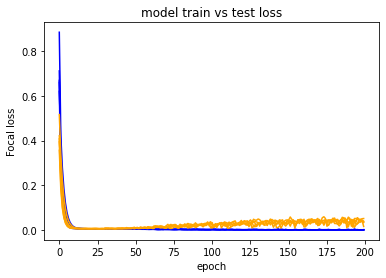

(array([[72.76850939, 41.8345809 ,  5.09134264],
        [73.45534563, 43.30572486,  5.37573742],
        [73.03075194, 44.30549741, 10.63080673],
        [74.07844663, 44.41047311,  5.66613814],
        [72.77078629, 41.97224379,  5.11083858]]),
 [[0.1451104082003719,
   0.7549223226628021,
   0.572010827390082,
   0.7611846366086416,
   0.06068601569917865,
   0,
   0.17768300167993942,
   0.8751691563136055],
  [0.3164282512292441,
   0.7871264361402348,
   0.5213137962964628,
   0.7295720173435357,
   0.09186352138943503,
   0,
   0.14648858471509676,
   0.8716654281921149],
  [0.2865384793848071,
   0.7735848845547547,
   0.5455696422615183,
   0.725252528628858,
   0.15769231509174833,
   0.05882352793582794,
   0.12730465136550267,
   0.8696739147678517],
  [0.32156211878662927,
   0.796680493432504,
   0.5623735134992576,
   0.7423609046449536,
   0.11818181442327738,
   0,
   0.1361256541706985,
   0.875553216413678],
  [0.2262649235808974,
   0.7953564393099845,
   0.46233382

In [9]:
run_exp_hist(X_tr, Y_tr, test[0], test[1], repeats=5, gamma = 5,epochs=200,LSTM =False,TCN=True,CV = False)


Evaluate model


Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(1, None, 75)]           0         
_________________________________________________________________
tcn (TCN)                    (1, None, 64)             138368    
_________________________________________________________________
dense (Dense)                (1, None, 200)            13000     
_________________________________________________________________
dense_1 (Dense)              (1, None, 8)              1608      
Total params: 152,976
Trainable params: 152,976
Non-trainable params: 0
_________________________________________________________________
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorf

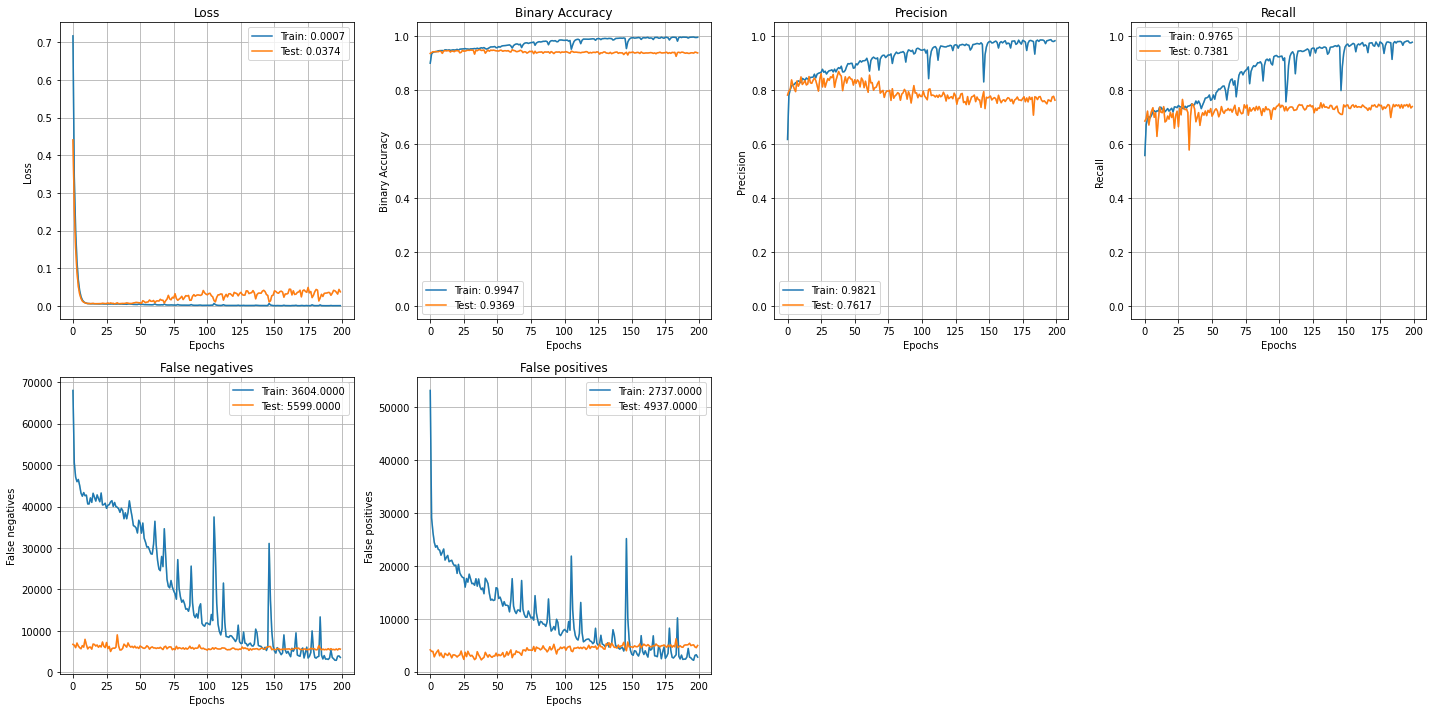

In [10]:
hist, loss, accuracy, wf1, wf1_, mf1, F1_tab, Ptab, Rtab = evaluate_model_TCN(X_tr, Y_tr, test[0], test[1],gamma=5 , epochs = 200, plot = 1, single_run = 1)

In [11]:

predict(test[0], test[1],'TCN',batch_size = 1, epochs = 1)

Loaded model from disk
29/29 [==============================] - 0s 6ms/step - loss: 0.0374 - binary_accuracy: 0.9369 - precision_2: 0.7617 - recall_2: 0.7381 - false_negatives_1: 5599.0000 - false_positives_1: 4937.0000
F1 score per label:  [0.31105902690195736, 0.7797763862425804, 0.4837980414915739, 0.7469320045871499, 0.13092551406268996, 0.048780489644254, 0.15708274687024568, 0.8707813044057238]
Precision per label:  [0.27793297, 0.91170895, 0.52970296, 0.73069435, 0.14871795, 0.083333336, 0.29116118, 0.83593464]
Recall per label:  [0.35314995, 0.68120044, 0.445215, 0.76390773, 0.116935484, 0.03448276, 0.10755442, 0.90865964]
Macro F1 score:  0.44114196  ; Weighted F1 score:  0.7342199  ; Proportional F1 score:  0.09649046211768753
Prediction will be saved into Results/


In [14]:
from google.colab import files
! zip -r Results.zip Results/opt_TCN_model
files.download("Results.zip")


updating: Results/opt_TCN_model/ (stored 0%)
updating: Results/opt_TCN_model/variables/ (stored 0%)
updating: Results/opt_TCN_model/variables/variables.data-00000-of-00001 (deflated 13%)
updating: Results/opt_TCN_model/variables/variables.index (deflated 77%)
updating: Results/opt_TCN_model/saved_model.pb (deflated 94%)
updating: Results/opt_TCN_model/assets/ (stored 0%)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>